In [1]:
import os
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
sys.path.append('../../src')
from Library import VerboseLibrary
import matplotlib.colors as mcolors

named_colors = list(mcolors.TABLEAU_COLORS)

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Models

In [2]:
model_names = sorted(os.listdir('./models_R'))
len(model_names)

10

In [3]:
model_loss_history = {}
model_loss_weights = {}
model_equations = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_R', name)).to(device)
    model_loss_history[name] = np.array(model.loss_history)
    model_loss_weights[name] = {
        'reconstruction': model.reconstruction_loss_weight,
        'equation_x': model.equation_x_loss_weight,
        'equation_z': model.equation_z_loss_weight,
        'coefficient':
         model.coefficient_loss_weight
    }
    model_equations[name] = VerboseLibrary(model.library).build_sympy()

100%|██████████| 10/10 [00:02<00:00,  3.51it/s]


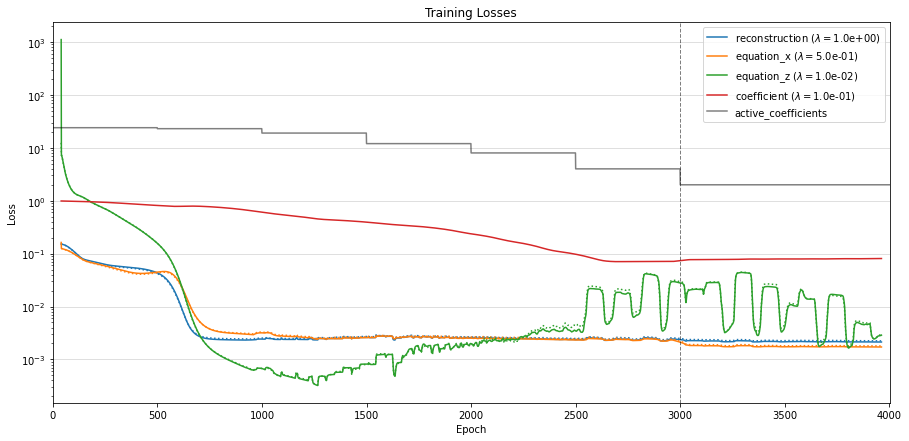

In [ ]:
model_name = model_names[-1]
smooth_lengthscale = (4002 // 50)
t = np.arange(4002)[smooth_lengthscale//2: -smooth_lengthscale//2+1]
refinement_beginning_epoch = 3001

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for k, c in zip(['reconstruction', 'equation_x', 'equation_z'], named_colors):
    v = model_loss_history[model_name].item()[k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, label=k + r' ($\lambda = $' + '{:.1e})'.format(model_loss_weights[model_name][k]), color=c)
    v = model_loss_history[model_name].item()['val_' + k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, color=c, linestyle=':')

v = model_loss_history[model_name].item()['coefficient']
ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, label='coefficient' + r' ($\lambda = $' + '{:.1e})'.format(model_loss_weights[model_name]['coefficient']), color='tab:red')

v = model_loss_history[model_name].item()['active_coefficients']
ax.plot(v, label='active_coefficients', color='black', alpha=0.5)

ax.set_xlim(0, len(v)); ax.axvline(refinement_beginning_epoch, color='black', linestyle='--', linewidth=1, alpha=0.5); ax.set_yscale('log');
ax.legend(); ax.grid(axis='y', alpha=0.5); ax.set_xlabel('Epoch'); ax.set_ylabel('Loss'); ax.set_title('Training Losses');

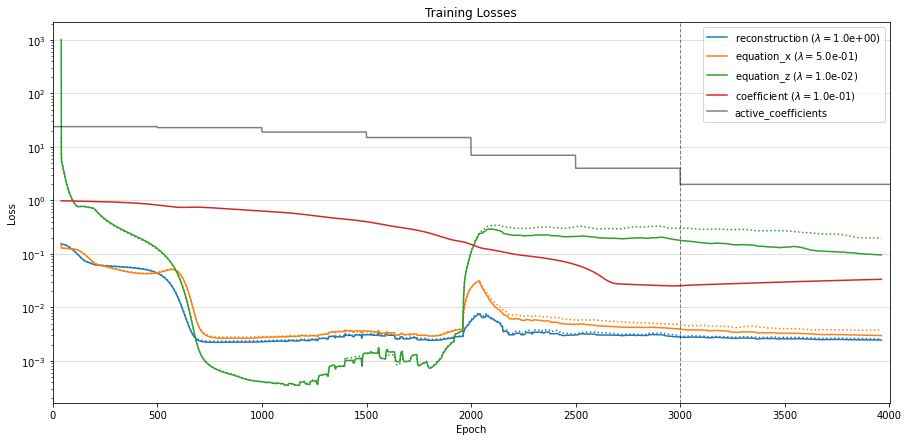

In [ ]:
model_name = model_names[9]
smooth_lengthscale = (4002 // 50)
t = np.arange(4002)[smooth_lengthscale//2: -smooth_lengthscale//2+1]
refinement_beginning_epoch = 3001

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for k, c in zip(['reconstruction', 'equation_x', 'equation_z'], named_colors):
    v = model_loss_history[model_name].item()[k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, label=k + r' ($\lambda = $' + '{:.1e})'.format(model_loss_weights[model_name][k]), color=c)
    v = model_loss_history[model_name].item()['val_' + k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, color=c, linestyle=':')

v = model_loss_history[model_name].item()['coefficient']
ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, label='coefficient' + r' ($\lambda = $' + '{:.1e})'.format(model_loss_weights[model_name]['coefficient']), color='tab:red')

v = model_loss_history[model_name].item()['active_coefficients']
ax.plot(v, label='active_coefficients', color='black', alpha=0.5)

ax.set_xlim(0, len(v)); ax.axvline(refinement_beginning_epoch, color='black', linestyle='--', linewidth=1, alpha=0.5); ax.set_yscale('log');
ax.legend(); ax.grid(axis='y', alpha=0.5); ax.set_xlabel('Epoch'); ax.set_ylabel('Loss'); ax.set_title('Training Losses');